In [ ]:
# dataset- https://drive.google.com/file/d/1XvS2y7eA-yPn8aVbfobCQAlMNB06J_wQ/view?usp=drive_link

In [13]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [25]:
# data import
data = pd.read_csv('/content/drive/MyDrive/datasets/E-com_Data.csv')

# data dimension
data.shape

(541116, 12)

In [17]:
# data sample
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


# RFM Analysis

1. Recency: How recently a customer has made a purchase
2. Frequency: How often a customer makes a purchase
3. Monetary value: How much money a customer spends on purchases

In [ ]:
# Columns used for RFM Analysis grouped by customer id

# 1. Recency - Date of Purchase
# 2. Frequency - Invoice no.
# 3. Monetary - Price

In [ ]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [27]:
# Renaming the columns
data = data.rename(columns = {'InvoieNo' : 'InvoiceNo.', 'Date of purchase' : 'Date'})

# Retaining the columns for analysis
data = data[['CustomerID','InvoiceNo.','Date','Price']]

# data shape
data.shape

(541116, 4)

In [19]:
# data sample
data.head()

,CustomerID,InvoiceNo.,Date,Price
0,4355.0,398177.0,29-10-2017,1926.0
1,4352.0,394422.0,05-10-2017,1740.0
2,4352.0,394422.0,12-10-2017,1866.0
3,4352.0,388633.0,22-08-2017,1869.0
4,4352.0,394422.0,10-10-2017,1888.0


In [28]:
# missing value check

round(data.isnull().mean()*100, 2)

,0
CustomerID,25.30
InvoiceNo.,0.58
Date,0.58
Price,0.58


In [29]:
# drop the missing value
data = data.dropna(subset = ['CustomerID'])

# missing value percentage after treatment
round(data.isnull().mean()*100, 2)

,0
CustomerID,0.0
InvoiceNo.,0.0
Date,0.0
Price,0.0


In [30]:
# data dimension after dropping the missing values
data.shape

(404189, 4)

In [31]:
# data duplicates
print('Number of duplicate rows in the data before treating :', data.duplicated().sum())

data = data.drop_duplicates(ignore_index = True)

print('Number of duplicate rows in the data after treating :', data.duplicated().sum())

# data dimensions
data.shape

Number of duplicate rows in the data before treating : 1330
Number of duplicate rows in the data after treating : 0


(402859, 4)

In [ ]:
# data type of data
data.dtypes

,0
CustomerID,float64
InvoiceNo.,float64
Date,object
Price,float64


In [ ]:
# Typecasting CustomerId, InvoiceNo. and date columns
data['CustomerID'] = data['CustomerID'].astype(int)
data['InvoiceNo.'] = data['InvoiceNo.'].astype(int)
data['Date'] = pd.to_datetime(data['Date'])

# data after typecasting
data.dtypes

,0
CustomerID,int64
InvoiceNo.,int64
Date,datetime64[ns]
Price,float64


In [ ]:
data.head()

,CustomerID,InvoiceNo.,Date,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


In [ ]:
# Maximum date of purchase
data['Date'].max()

Timestamp('2017-12-19 00:00:00')

In [ ]:
# Latest date of purchase
latest_date = dt.datetime(2017,12,20)
latest_date

datetime.datetime(2017, 12, 20, 0, 0)

# RFM

In [ ]:
# RFM function
RFMScore = data.groupby('CustomerID').agg({'Date': lambda x : (latest_date-x.max()).days, # Recency
                                           'InvoiceNo.' : lambda x : x.count(),           # Frequency
                                           'Price' : lambda x : x.sum()})                 # Monetary

# RFMScore
# Renaming the columns
RFMScore = RFMScore.rename(columns = {'Date' : 'Recency', 'InvoiceNo.' : 'Frequency', 'Price' : 'Monetary'})
# OR
# RFMScore.rename(columns = {'Date' : 'Recency', 'InvoiceNo.' : 'Frequency', 'Price' : 'Monetary'}, inplace = True)

# Converting to dataframe
RFMScore.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,2,4,181,550416.0
1,3,77,27,257404.0
2,4,19,72,176613.0
3,5,311,16,41976.0
4,6,37,84,151822.0


In [ ]:
# minimum and maximum values for each attributes
for cols in RFMScore.columns:
  print(f'For {cols} the min value is {RFMScore[cols].min()} and max value is {RFMScore[cols].max()}.')

For Recency the min value is 1 and max value is 381.
For Frequency the min value is 1 and max value is 7919.
For Monetary the min value is -50372.0 and max value is 35472089.0.


In [ ]:
# Quantile or splitting the data

quantile  = RFMScore.quantile(q = [0.25, 0.5, 0.75])
quantile = quantile.to_dict()
quantile

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetary': {0.25: 38140.0, 0.5: 83635.0, 0.75: 205444.0}}

In [ ]:
# Function for the score

# lower the value of recency more vluable the customer is

def recency_score(x,q,d):
  if x <= d[q][0.25]:
    return 1             # higher rank
  elif x <= d[q][0.50]:
    return 2
  elif x <= d[q][0.75]:
    return 3
  else:
    return 4             # lower rank

# higher the value of frequency & monetary more valuable the customer is

def FnM_Score(x,q,d):
  if x <= d[q][0.25]:
    return 4             # lower rank
  elif x <= d[q][0.50]:
    return 3
  elif x <= d[q][0.75]:
    return 2
  else:
    return 1             # higher rank

In [ ]:
# columns to accomodate the score from the function
RFMScore['R'] = RFMScore['Recency'].apply(recency_score, args=('Recency', quantile, ))
RFMScore['F'] = RFMScore['Frequency'].apply(FnM_Score, args=('Frequency', quantile, ))
RFMScore['M'] = RFMScore['Monetary'].apply(FnM, args=('Monetary', quantile, ))

In [ ]:
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2,4,181,550416.0,1,1,1
3,77,27,257404.0,3,3,1
4,19,72,176613.0,2,2,2
5,311,16,41976.0,4,4,3
6,37,84,151822.0,2,2,2


In [ ]:
# Loyalty Score
RFMScore['LoyaltyScore'] = RFMScore[['R','F','M']].sum(axis=1)
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,LoyaltyScore
CustomerID,,,,,,,
2,4,181,550416.0,1,1,1,3
3,77,27,257404.0,3,3,1,7
4,19,72,176613.0,2,2,2,6
5,311,16,41976.0,4,4,3,11
6,37,84,151822.0,2,2,2,6


In [ ]:
# Loyalty Badge
badge =  ['Platinum', 'Gold', 'Silver', 'Bronze']
score_cut = pd.qcut(RFMScore.LoyaltyScore, 4, labels = badge)
RFMScore['LoyaltyBadge'] = score_cut.values
RFMScore.head()

,Recency,Frequency,Monetary,R,F,M,LoyaltyScore,LoyaltyBadge
CustomerID,,,,,,,,
2,4,181,550416.0,1,1,1,3,Platinum
3,77,27,257404.0,3,3,1,7,Gold
4,19,72,176613.0,2,2,2,6,Gold
5,311,16,41976.0,4,4,3,11,Bronze
6,37,84,151822.0,2,2,2,6,Gold


In [ ]:
# Segmented data
segmented_data = RFMScore.reset_index()
segmented_data = segmented_data[['Recency',	'Frequency',	'Monetary', 'LoyaltyBadge']]

# mapped data sample
segmented_data.head()

,Recency,Frequency,Monetary,LoyaltyBadge
0,4,181,550416.0,Platinum
1,77,27,257404.0,Gold
2,19,72,176613.0,Gold
3,311,16,41976.0,Bronze
4,37,84,151822.0,Gold


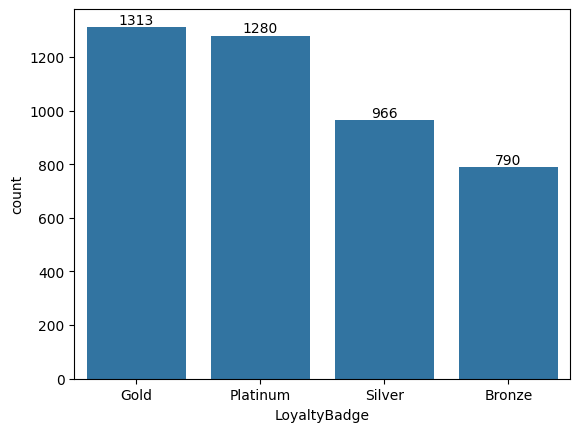

In [ ]:
# Distribition of the customers
ax = sns.countplot(x=segmented_data['LoyaltyBadge'],
                   order = segmented_data['LoyaltyBadge'].value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# Exporting the segmented data as csv for further usecase

# segmented_data.to_csv('/content/sample_data')